<a href="https://colab.research.google.com/github/itshardlight/BestBuy_Assesment04/blob/main/2418312_UnishMaharjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from google.colab import drive
drive.mount('/content/drive')
#here we have imported drive and linked it with google collab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.1 Problem - 1:

# • Dataset Overview:
# 1. Load the dataset and display the first 10 rows.

In [103]:
import pandas as pd
#here we are importing the pandas library
csvfile1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHR-2024-5CS037.csv')
# Printing the top 10 datas using head(10)
csvfile1.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


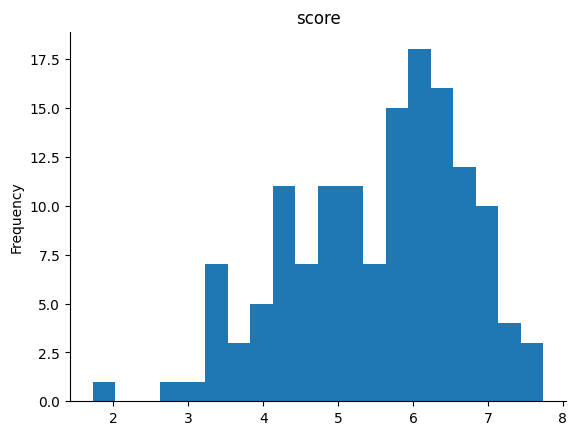

In [104]:
# @title score

from matplotlib import pyplot as plt
csvfile1['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 2. Identify the number of rows and columns in the dataset.

In [105]:
#finding out the number of rows and column using .shapes
rows,column=csvfile1.shape
#printing the number of rows and column
print("Number of rows:", rows)
print("Number of columns:", column)

Number of rows: 143
Number of columns: 9


# 3. List all the columns and their data types.

In [106]:
# using of dtypes to figuring out the type of each cloumn of the database(csvfile)
print(csvfile1.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


# • Basic Statistics:


# 1. Calculate the mean, median, and standard deviation for the Score column.


In [107]:
mean = csvfile1['score'].mean()
#figuring out the mean using the mean column
median = csvfile1['score'].median()
#figuring out the mean using the median column
std = csvfile1['score'].std()
#figuring out the mean using the standard deviation column
print("mean is:",mean)
print("median is:",median)
print("standard deviation is:",std)
#we are printing the mean median and the standard deviation

mean is: 5.52758041958042
median is: 5.785
standard deviation is: 1.1707165099442995


# 2. Identify the country with the highest and lowest happiness scores.

In [108]:
#loc is used to give access to specific column of the database(csvfile)
#idxmax,idxmin is used to find the min and max value of the column
highest = csvfile1.loc[csvfile1['score'].idxmax(), 'Country name']
lowest = csvfile1.loc[csvfile1['score'].idxmin(), 'Country name']
# printing the highest and the lowest country according to the score
print("Country with highest score:", highest)
print("Country with lowest score:", lowest)

Country with highest score: Finland
Country with lowest score: Afghanistan


# • Missing Values:


# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [109]:
#checking if there are any empty(null) cell in the database
#adding up the number of empty cells of each columns in each rows
missing_cells = csvfile1.isnull().sum()
print(missing_cells)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


# • Filtering and Sorting:


# 1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [110]:
filtered_data = csvfile1[csvfile1['score'] > 7.5]
#separate the data if the score of the country is greater than 7.5 in the database(csvfile)
print(filtered_data[['Country name','score']])
#printing out the country name and score from the separated data

  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [111]:
#we have selected the specific column using by
# and for printing out the data in decending order we have used accending = False
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
#By using head(10) we have printed the top 10 countries from the top
print(sorted_data.head(10)[['Country name','Log GDP per capita']])

  Country name  Log GDP per capita
1      Denmark               1.908
2      Iceland               1.881
0      Finland               1.844


# Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)

In [112]:
#we have defined a function to figure out if the country  lies in low medium or high range according to the score of individual country
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
#csvfile1['Happiness Category'] adding new column
#.apply is used to apply all function to each row in the database
csvfile1['Happiness Category'] = csvfile1['score'].apply(categorize_happiness)
# we have selected required column and stored it in csvfile2
csvfile2=csvfile1[['Country name', 'score', 'Happiness Category']]
csvfile2.to_csv('csvfile2.csv')
#helps to create a new file if not found else override it


# 2. Data Visualizations:


# • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

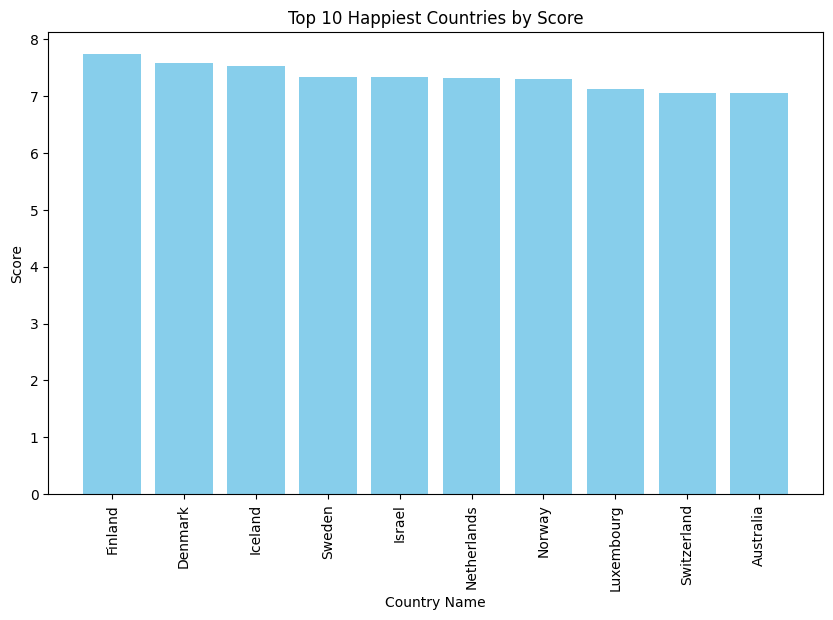

In [113]:
import matplotlib.pyplot as pltce
#importing the library used for plotting our data
#we are sorting the datas in decending order
top_10_happiest = csvfile1.sort_values(by='score', ascending=False).head(10)

#Used for scaling of x and y (width and height) of the individual graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')

#Add labels and title to the bar plot
plt.title('Top 10 Happiest Countries by Score')
plt.ylabel('Score')
plt.xlabel('Country Name')
#rotating the x axis values
plt.xticks(rotation=90)
#Show the plot
plt.show()


# • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

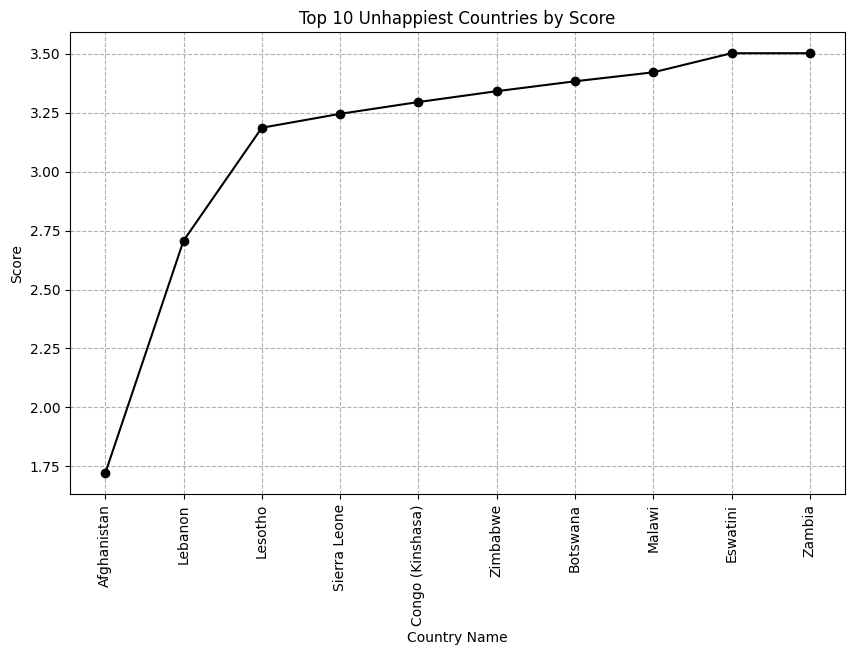

In [114]:
import matplotlib.pyplot as plt

# assending order is true in default
top_10_unhappiest = csvfile2.sort_values(by='score').head(10)

# Create the line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='black', linestyle='-')

# Add labels and title
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Score')

#rotating the x axis values
plt.xticks(rotation=90)

#background of the fig
plt.grid(visible=True, linestyle='--')

# Show the plot

plt.show()


# • Plot a histogram for the Score column to show its distribution and also interpret.

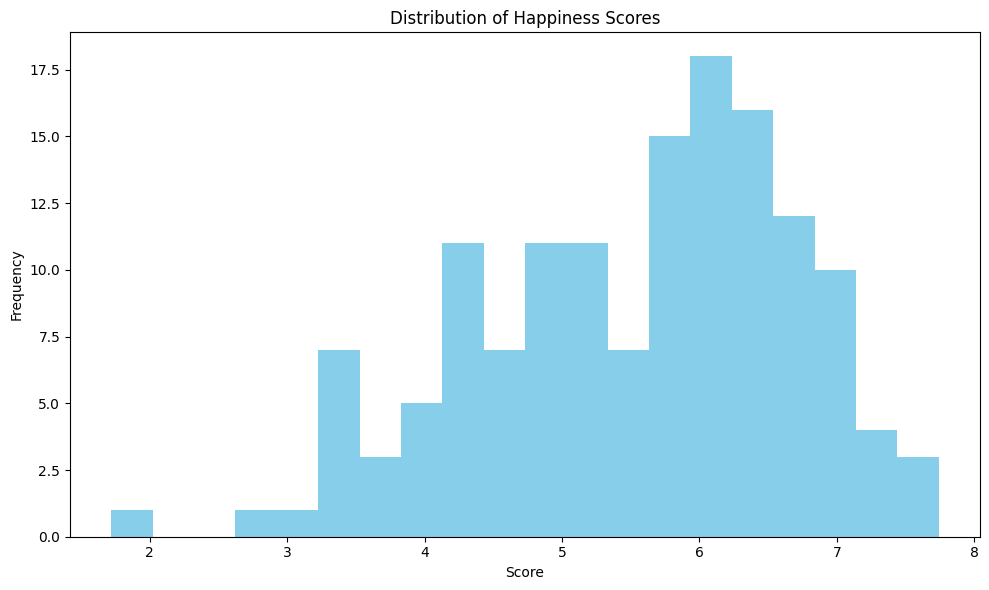

The above figure is right-skewed distribution


In [115]:
import matplotlib.pyplot as plt

# Create the histogram for the Score column
plt.figure(figsize=(10, 6))
plt.hist(csvfile2['score'], bins=20, color='skyblue', alpha=1)  # Create the histogram

# Add labels and title
plt.title('Distribution of Happiness Scores')  # Title of the plot
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Add gridlines for better readability (optional)
# plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()
print("The above figure is right-skewed distribution")


# • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

Unish Maharjan 2418312


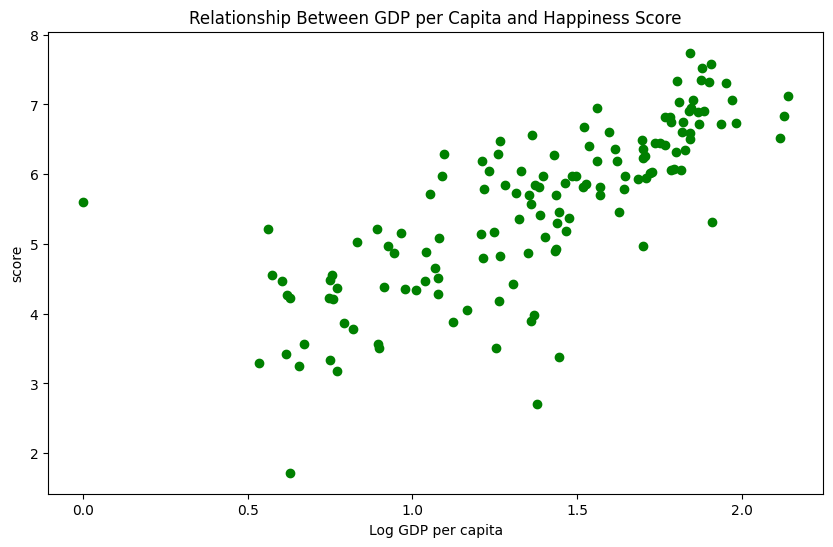

In [123]:
# Create the scatter plot for GDP per Capita vs Score
plt.figure(figsize=(10, 6))
plt.scatter(csvfile1['Log GDP per capita'], csvfile1['score'], color='green')

# Add labels and title
print('Unish Maharjan 2418312')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('score')

# Show the plot
plt.show()


# 3.2 Problem - 2 - Some Advance Data Exploration Task:


# Task - 1 - Setup Task - Preparing the South-Asia Dataset:

# Steps:
1. Define the countries in South Asia with a list for example: south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [124]:
# here we have the name of the countries that lie on south asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
# we have filter out the south asian countries from the total data base and stored it in a different csv file(database)
filtered_df = csvfile1[csvfile1['Country name'].isin(south_asian_countries)]
print(filtered_df)
# saving the filtered countires name in new csv file(database)
filtered_df.to_csv('csvfile3.csv', index=False)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

# Task - 2 - Composite Score Ranking:

# Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.



  Country name  score  Log GDP per capita  Social support  \
3    Sri Lanka  3.898               1.361           1.179   
0        Nepal  5.158               0.965           0.990   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
3                    0.586                         0.583       0.144   
0                    0.443                         0.653       0.209   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness Categor

<BarContainer object of 5 artists>

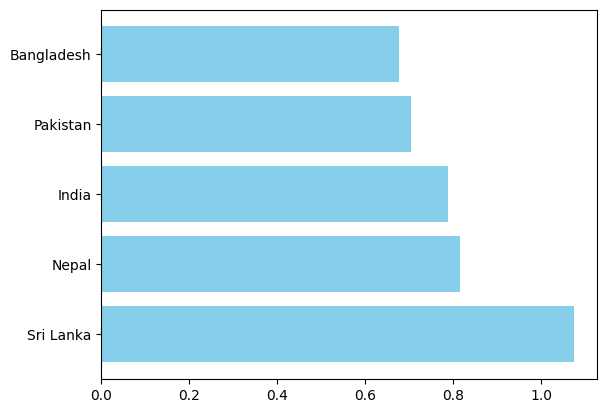

In [125]:
csvfile3 = pd.read_csv('/content/csvfile3.csv')
# by using the given formula we have figured out the composite score and stored it in a new column
csvfile3['Composite score']=0.40*csvfile3['Log GDP per capita']+0.30*csvfile3['Social support']+0.30*csvfile3['Healthy life expectancy']
# we have sroted the data in decending order with respect to composit score
sorted_ab_composite_score = csvfile3.sort_values(by='Composite score', ascending=False)
# By using head we have ploted the top 5 countries country name and composite
print(sorted_ab_composite_score)
plt.barh(sorted_ab_composite_score.head(5)['Country name'],sorted_ab_composite_score.head(5)['Composite score'], color='skyblue')


# Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Text(0.5, 1.0, 'Scatter Plot of Log GDP per Capita vs Score with Outliers Highlighted')

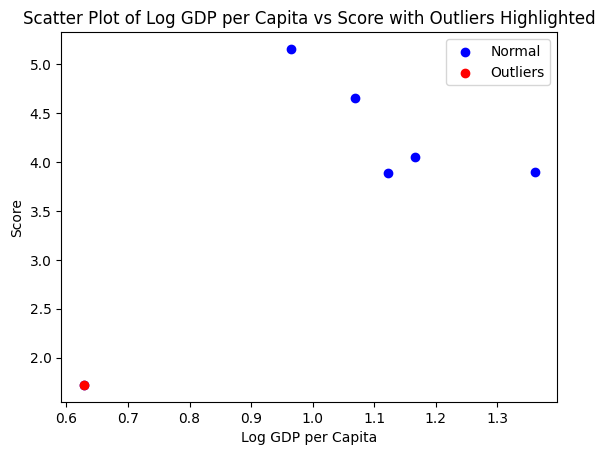

In [126]:
# By using the formula we have figured out Q1 and Q3 of the score and gdp per capita using the score column
Q1_score = csvfile3['score'].quantile(0.25)
Q3_score = csvfile3['score'].quantile(0.75)
#We got IQR (inter Quartile range) by figuring out the difference between the Q3 and Q1
IQR_score = Q3_score - Q1_score
Q1_Gdp = csvfile3['Log GDP per capita'].quantile(0.25)
Q3_Gdp = csvfile3['Log GDP per capita'].quantile(0.75)
IQR_Gdp = Q3_Gdp - Q1_Gdp
#By using given formula we have figured out the lower and upper bound score of both score and Gdp per capita
lower_bound_score = Q1_score -1.5*IQR_score
upper_bound_score = Q3_score +1.5*IQR_score
lower_bound_Gdp = Q1_Gdp -1.5*IQR_Gdp
upper_bound_Gdp = Q3_Gdp +1.5*IQR_Gdp
# | is or operator in python
outliers_score = csvfile3[(csvfile3['score'] < lower_bound_score) | (csvfile3['score'] > upper_bound_score)]
outliers_Gdp = csvfile3[(csvfile3['Log GDP per capita'] < lower_bound_Gdp) | (csvfile3['Log GDP per capita'] > upper_bound_Gdp)]
# By using scatter plot we have plotted the normal in blue color and the outlier in red color

plt.scatter(csvfile3['Log GDP per capita'], csvfile3['score'], color='blue', label='Normal', alpha=1)
plt.scatter(outliers_Gdp['Log GDP per capita'], outliers_score['score'], color='red', label='Outliers', alpha=1)
plt.legend()
plt.show
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Scatter Plot of Log GDP per Capita vs Score with Outliers Highlighted')


#Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

Text(0.5, 1.0, 'Scatter Plot of Freedom to make life choices vs Generosity')

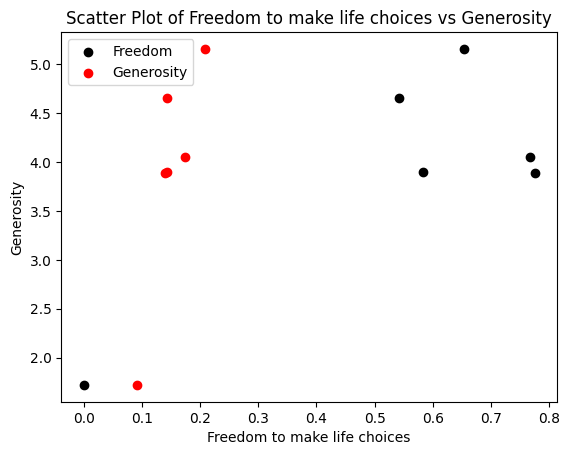

In [127]:

# print(csvfile3[['Country name','Freedom to make life choices','Generosity','score']])
coorelation=csvfile3['Freedom to make life choices'].corr(csvfile3['score'])
# print(coorelation)
coorelation=csvfile3['Generosity'].corr(csvfile3['score'])
# print(coorelation)
#By using .corr we have figured out the coorealtion between Generosity and Freedom to make life choices with score
plt.scatter(csvfile3['Freedom to make life choices'], csvfile3['score'], color='black',label='Freedom')
plt.scatter(csvfile3['Generosity'], csvfile3['score'], color='red',label='Generosity')
plt.legend()
plt.show
plt.xlabel('Freedom to make life choices')
plt.ylabel('Generosity')
plt.title('Scatter Plot of Freedom to make life choices vs Generosity')



#Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Decending
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
Ascending
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


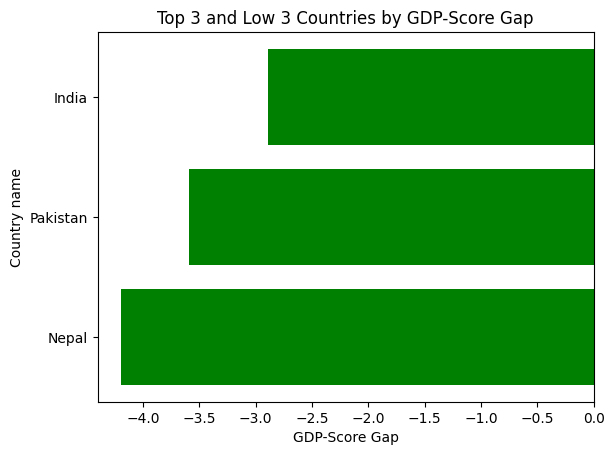

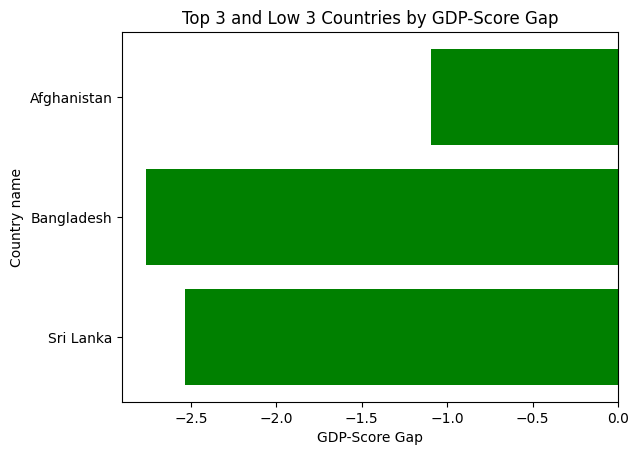

In [128]:
csvfile3['GDP-Score Gap']=csvfile3['Log GDP per capita']-csvfile3['score']
decending = csvfile3.sort_values(by='GDP-Score Gap', ascending=False)
assending = csvfile3.sort_values(by='GDP-Score Gap', ascending=True)
print("Decending")
print(decending.head(3)[['Country name','GDP-Score Gap']])
print("Ascending")
print(assending.head(3)[['Country name','GDP-Score Gap']])
top3=csvfile3.head(3)
low3=csvfile3.tail(3)
plt.barh(top3['Country name'], top3['GDP-Score Gap'], color='green')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.title('Top 3 and Low 3 Countries by GDP-Score Gap')
plt.show()
plt.barh(low3['Country name'], low3['GDP-Score Gap'], color='green')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.title('Top 3 and Low 3 Countries by GDP-Score Gap')
plt.show()

#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [129]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

csvfile4 = csvfile1[csvfile1['Country name'].isin(middle_east_countries)]
print(csvfile4)
csvfile4.to_csv('csvfile4.csv')

             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

# 1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [130]:
csvfile4 = pd.read_csv('/content/csvfile4.csv')
mean = csvfile3['score'].mean()
std = csvfile3['score'].std()
mean2 = csvfile4['score'].mean()
std2 = csvfile4['score'].std()
csvfile4['dif']=mean-mean2
print(csvfile4['dif'])


0   -1.516433
1   -1.516433
2   -1.516433
3   -1.516433
4   -1.516433
5   -1.516433
6   -1.516433
7   -1.516433
8   -1.516433
9   -1.516433
Name: dif, dtype: float64


#2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

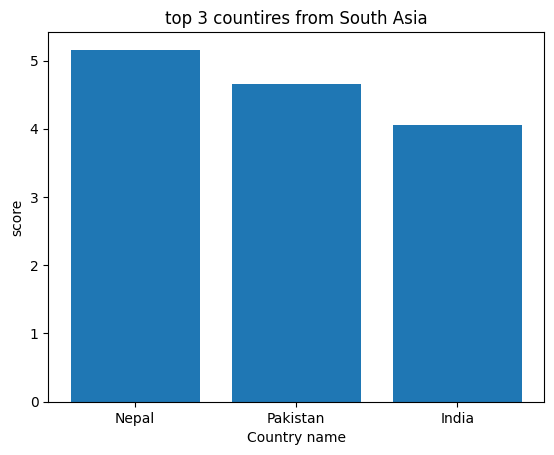

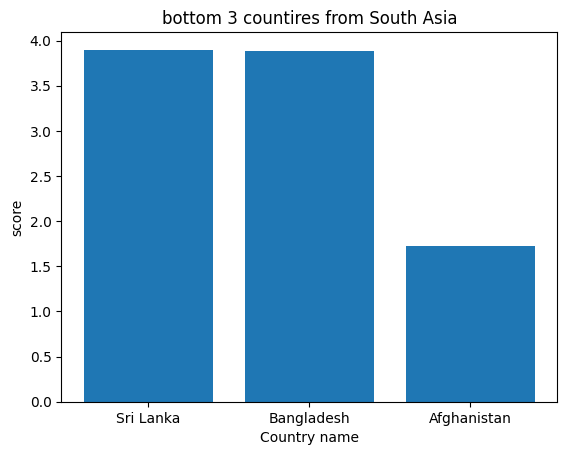

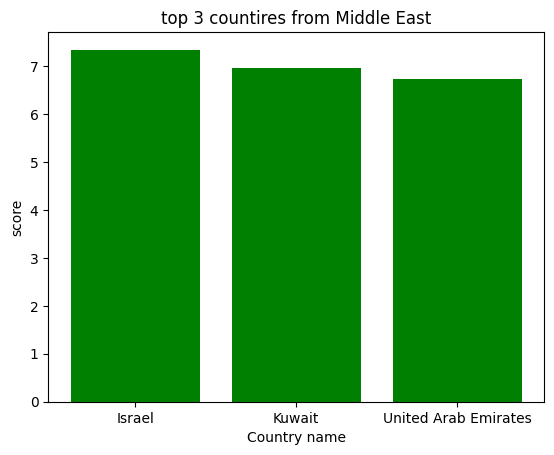

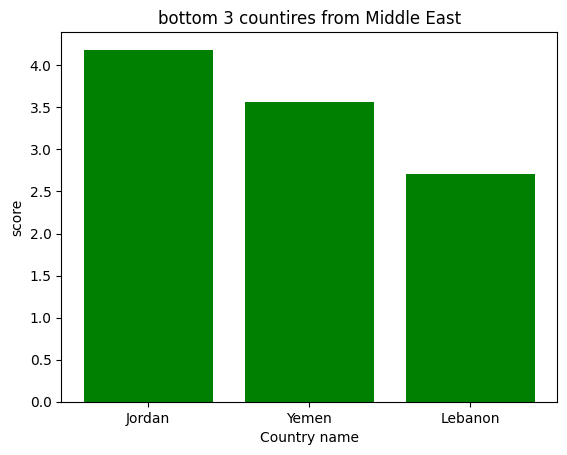

In [131]:

plt.bar(csvfile3.head(3)['Country name'],csvfile3.head(3)['score'])
plt.xlabel('Country name')
plt.ylabel('score')
plt.title('top 3 countires from South Asia')
plt.show()
plt.bar(csvfile3.tail(3)['Country name'],csvfile3.tail(3)['score'])
plt.xlabel('Country name')
plt.ylabel('score')
plt.title('bottom 3 countires from South Asia')
plt.show()
plt.bar(csvfile4.head(3)['Country name'],csvfile4.head(3)['score'],color="green")
plt.xlabel('Country name')
plt.ylabel('score')
plt.title('top 3 countires from Middle East')
plt.show()
plt.bar(csvfile4.tail(3)['Country name'],csvfile4.tail(3)['score'],color="green")
plt.xlabel('Country name')
plt.ylabel('score')
plt.title('bottom 3 countires from Middle East')
plt.show()